In [105]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, homogeneity_score,davies_bouldin_score
from sklearn.metrics.cluster import rand_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [106]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [107]:
class KMeans:
    
    def __init__(self, K):
        self.K = K
    
    def initialize_random_centroids(self, X):
        m, n = np.shape(X)
        centroids = np.empty((self.K, n))
        for i in range(self.K):
            centroids[i] =  X[np.random.choice(range(m))] 
        return centroids
    
    def closest_centroid(self, x, centroids):
        distances = np.empty(self.K)
        for i in range(self.K):
            distances[i] = euclidean_distance(centroids[i], x)
        return np.argmin(distances)
    
    def create_clusters(self, centroids, X):
        m = X.shape[0]
        cluster_idx = np.empty(m)
        for i in range(m):
            cluster_idx[i] = self.closest_centroid(X[i], centroids)
        return cluster_idx
    
    def compute_means(self, cluster_idx, X):
        n = X.shape[1]
        centroids = np.empty((self.K, n))
        for i in range(self.K):
            points = X[cluster_idx == i]
            centroids[i] = np.mean(points, axis=0)
        return centroids
    
    def fit(self, X, max_iterations=500):
        centroids = self.initialize_random_centroids(X)
        for _ in range(max_iterations):
            clusters = self.create_clusters(centroids, X)
            previous_centroids = centroids                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
            centroids = self.compute_means(clusters, X)
            diff = previous_centroids - centroids
            if not diff.any():
                return clusters
        return clusters

In [108]:
def showmetricks(data, y, pred):
    print("Внешние метрики")
    print(f"Rand score: {rand_score(pred, y)}")
    print(f"Homogeneity Score: {homogeneity_score(pred, y)}")
    print("Внутренние метрики")
    print(f"Silhouette score: {silhouette_score(data, y)}")
    print(f"Davies bouldin score: {davies_bouldin_score(data, y)}")

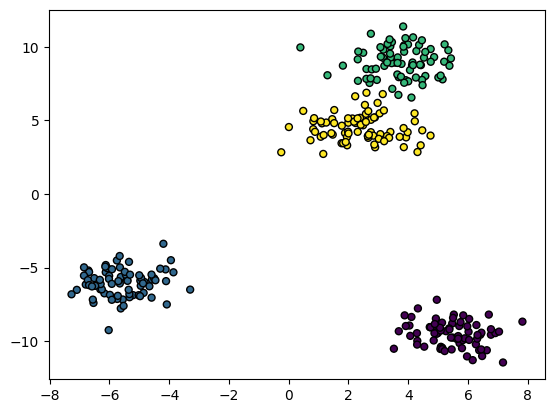

In [109]:



data, data_y = make_blobs(n_samples=300, n_features=5, centers = 4, random_state=10)
plt.scatter(data[:, 0], data[:, 1], marker="o", c=data_y, s=25, edgecolor="k")

Внешние метрики
Rand score: 1.0
Homogeneity Score: 1.0
Внутренние метрики
Silhouette score: 0.7933042402979443
Davies bouldin score: 0.2972971196615378


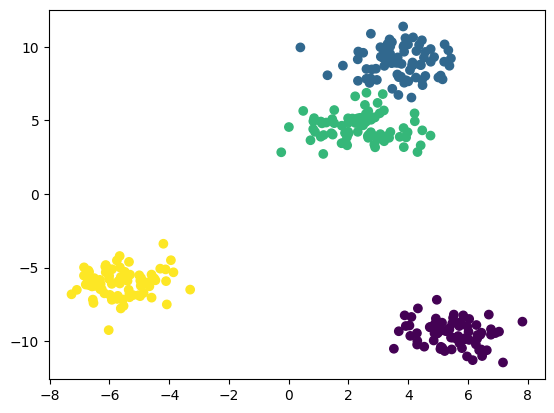

In [110]:
kmeans = KMeans(4).fit(data)
plt.scatter(data[:,0], data[:,1], c=kmeans)
showmetricks(data, data_y, kmeans)